In [6]:
dic = {}
with open('dataset/purchase_order.tab') as f:
    for line in f.readlines():
        ele = line.strip().split('\t')
        userid = ele[2]
        productid = ele[3]
        if userid not in dic:
            dic[userid] = [productid]
        else:
            dic[userid].append(productid)
for user in dic:
    print user, len(dic[user])
    break

 U465109665 1


In [8]:
import pandas as pd
m_cols = ['Time','Action','User','Product', 'Quantity','Price']
df = pd.read_csv('dataset/purchase_order.tab', sep='\t', names = m_cols)
df.head()

,Time,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249


In [9]:
df['User'].head()

0      U312622727
1      U239012343
2    U10007697373
3      U296328517
4      U300884570
Name: User, dtype: object

In [10]:
df['User'].count()

54772

In [11]:
df['User'].nunique()

32539

In [13]:
df.groupby('User')['Product'].count().head()

User
U1000001354     1
U10000044910    1
U10000056953    5
U10000065461    1
U10000092625    5
Name: Product, dtype: int64

In [25]:
df2 = df.groupby('Product')['Product'].count().\
sort_values(ascending=False).head(30)

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


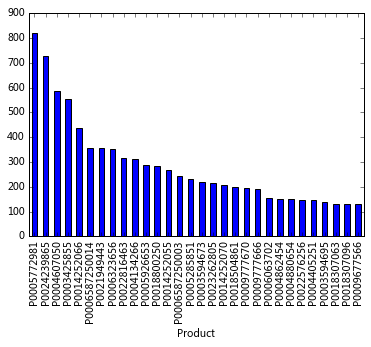

In [27]:
df2.plot(kind='bar')

In [30]:
df.head().to_excel('123.xlsx')

In [32]:
import sqlite3 as lite
with lite.connect('test.sqlite') as db:
    df.to_sql('orders', con = db, if_exists="replace")

## Pandas Aggregation

In [65]:
import pandas as pd
m_cols = ['Time','Action','User','Product', 'Quantity','Price']
orders = pd.read_csv('dataset/purchase_order.tab', sep='\t', names = m_cols, parse_dates={'Dates': [0]})
orders.head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249


In [66]:
#orders['Product'] == 'P0006944501'
#orders[orders['Product'] == 'P0006944501']
orders[orders['Product'] == 'P0006944501']['Price']

0       1069
9       1069
775     1069
2511    1069
2515    1069
2522    1069
5457    1069
5706    1069
Name: Price, dtype: float64

In [67]:
orders[orders['Product'] == 'P0006944501']['Price'].mean()

1069.0

In [68]:
orders[orders['Product'] == 'P0006944501']['Price'].max()

1069.0

In [69]:
orders[orders['Product'] == 'P0006944501']['Price'].min()

1069.0

In [70]:
orders[orders['Product'] == 'P0006944501']['Price'].describe()

count       8
mean     1069
std         0
min      1069
25%      1069
50%      1069
75%      1069
max      1069
Name: Price, dtype: float64

In [71]:
orders.head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249


In [72]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Dates       54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.9+ MB


In [73]:
orders.groupby('Product')['Price'].mean().head()

Product
P0000005913       1590
P0000006020       1290
P0000006591        999
P0000007744       3280
P0000008190011    5083
Name: Price, dtype: float64

In [74]:
orders.groupby('Product')['Price'].mean().sort_values(ascending=False).head()

Product
P0000143511    438888
P0000143500    438888
P0006584093    320000
P0025280275    183900
P0000150006    111375
Name: Price, dtype: float64

In [75]:
orders.groupby('Product')['Price'].mean().sort_values(ascending=False).head(10)

Product
P0000143511       438888
P0000143500       438888
P0006584093       320000
P0025280275       183900
P0000150006       111375
P0018535252        98880
P0024251250030     98800
P0007107866        97900
P0009915463        93900
P0000218240035     93500
Name: Price, dtype: float64

In [76]:
orders.groupby('Product')['Price'].mean().sort_values(ascending=False)[0:3]

Product
P0000143511    438888
P0000143500    438888
P0006584093    320000
Name: Price, dtype: float64

In [77]:
orders['Total_Price'] = orders['Quantity'] * orders['Price']
orders[orders['Quantity'] >= 2].head()

,Dates,Action,User,Product,Quantity,Price,Total_Price
11,2015-07-01 00:05:03,order,U339736346,P0018924850,2,792,1584
13,2015-07-01 00:05:31,order,U465125671,P0003448524,2,390,780
34,2015-07-01 00:18:37,order,U46513478,P0023728806,2,899,1798
39,2015-07-01 00:22:07,order,U34197240,P0020100172,2,199,398
60,2015-07-01 00:39:22,order,U465146448,P0006173160,3,1076,3228


In [78]:
orders.groupby('User')['Total_Price'].sum().sort_values(ascending=False)[0:3]

User
U166708333      2942744
U10120098943    1451117
U142809250       747550
Name: Total_Price, dtype: float64

In [79]:
m_cols = ['Time','Action','User','Product']
views= pd.read_csv('dataset/purchase_view.tab', sep='\t',
            parse_dates={'Dates': [0]},names=m_cols, encoding='utf-8')
views.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 45.5+ MB


In [85]:
orders.groupby(['User','Product'])['Product'].size().head(10)
#type(orders.groupby(['User','Product'])['Product'].size().head(10))

User          Product       
U1000001354   P0014520085       1
U10000044910  P0018800250       1
U10000056953  P0003926850034    1
              P0013344760004    2
              P0013834251       1
              P0014251480003    1
U10000065461  P0023597022       1
U10000092625  P0018474750044    2
              P0023729451       1
              P0024077600013    1
dtype: int64

In [83]:
views.groupby(['User','Product'])['Product'].size().head(10)

User          Product    
None           PNone         1
U10000000225  P0007107111    1
              P0007107122    1
              P0007107413    1
              P0009440001    1
              P0009680484    1
              P0013856054    1
              P0018881936    1
              P0018881940    3
              P0021279602    2
dtype: int64

In [86]:
orders_cnt = orders.groupby(['User','Product'])['Product'].size().reset_index(name='buys')
orders_cnt.head()

,User,Product,buys
0,U1000001354,P0014520085,1
1,U10000044910,P0018800250,1
2,U10000056953,P0003926850034,1
3,U10000056953,P0013344760004,2
4,U10000056953,P0013834251,1


In [88]:
views_cnt = views.groupby(['User','Product'])['Product'].size().reset_index(name='views')
views_cnt.head()

,User,Product,views
0,None,PNone,1
1,U10000000225,P0007107111,1
2,U10000000225,P0007107122,1
3,U10000000225,P0007107413,1
4,U10000000225,P0009440001,1


In [89]:
merge_df = pd.merge(orders_cnt, views_cnt, on=['User','Product'], how='right')


In [91]:
merge_df.head()

,User,Product,buys,views
0,U10000044910,P0018800250,1,2
1,U10000056953,P0013834251,1,7
2,U10000065461,P0023597022,1,1
3,U10000092625,P0023729451,1,14
4,U10000092625,P0024236730,1,4


In [96]:
mdf = merge_df[merge_df['buys'].isnull()].groupby('views')['Product'].count()

In [102]:
mdf.head(10)

views
1     568697
2     104400
3      33909
4      15458
5       7851
6       4548
7       2591
8       1591
9       1043
10       708
Name: Product, dtype: int64

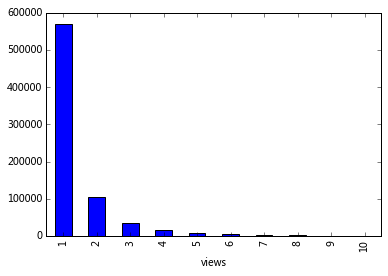

In [105]:
#?mdf.plot
mdf.head(10).plot(kind = 'bar')

In [106]:
mdf2 = merge_df[merge_df['buys'].notnull()].groupby('views')['Product'].count()

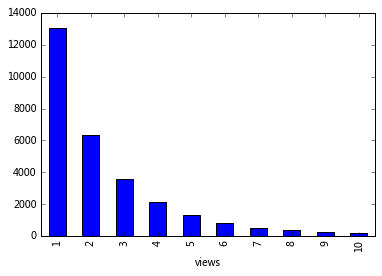

In [108]:
mdf2.head(10).plot(kind='bar')

In [126]:
a = mdf2.head(10).reset_index('views')
a.columns = ['views', 'buy']
a.set_index('views', inplace=True)

a['notbuy'] = mdf.head(10)

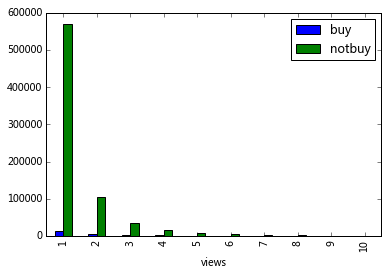

In [127]:
a.plot(kind='bar')

##  Pandas and Matplotlib

In [129]:
views.head()

,Dates,Action,User,Product
0,2015-07-01 00:00:01,view,U129297265,P0023468384
1,2015-07-01 00:00:03,view,U321001337,P0018926456
2,2015-07-01 00:00:05,view,U10070718237,P0000063593
3,2015-07-01 00:00:05,view,U393805241,P0005541535
4,2015-07-01 00:00:10,view,U10004621134,P0022135540


In [130]:
views.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Dates      1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 45.5+ MB


In [131]:
views['Dates'].head()

0   2015-07-01 00:00:01
1   2015-07-01 00:00:03
2   2015-07-01 00:00:05
3   2015-07-01 00:00:05
4   2015-07-01 00:00:10
Name: Dates, dtype: datetime64[ns]

In [153]:
a = views['Dates']
#a.dt.year.head()
#a.dt.month.head()
#a.dt.date.head()
a.dt.hour.head()

0    0
1    0
2    0
3    0
4    0
Name: Dates, dtype: int64

In [139]:
view_cnt = views.groupby(views['Dates'].dt.date)['Action'].count()


In [140]:
#%ls
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [145]:
?view_cnt.plot

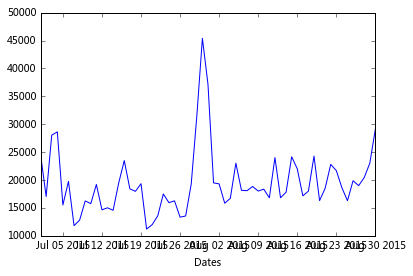

In [144]:
view_cnt.plot(kind='line')

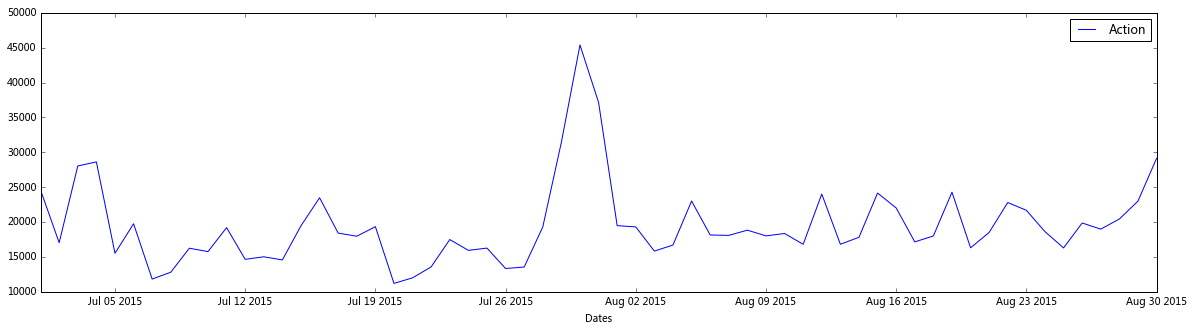

In [151]:
view_cnt.plot(kind='line', figsize=[20,5], legend=True)

In [154]:
view_hour_cnt = views.groupby(views['Dates'].dt.hour)['Action'].count()


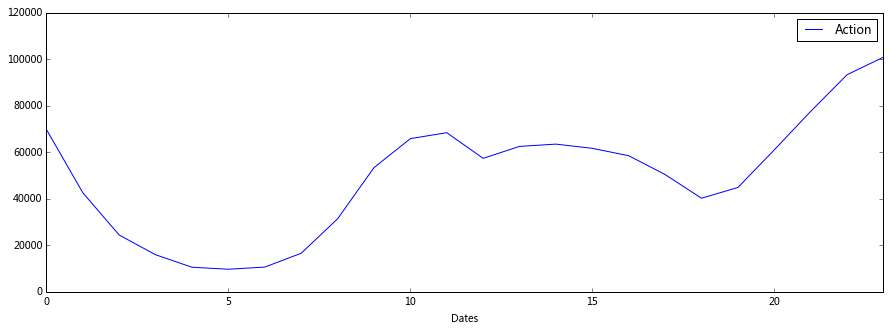

In [157]:
view_hour_cnt.plot(kind='line', figsize=[15,5], legend=True)

In [158]:
buy_cnt = orders.groupby(orders['Dates'].dt.date)['Action'].count()


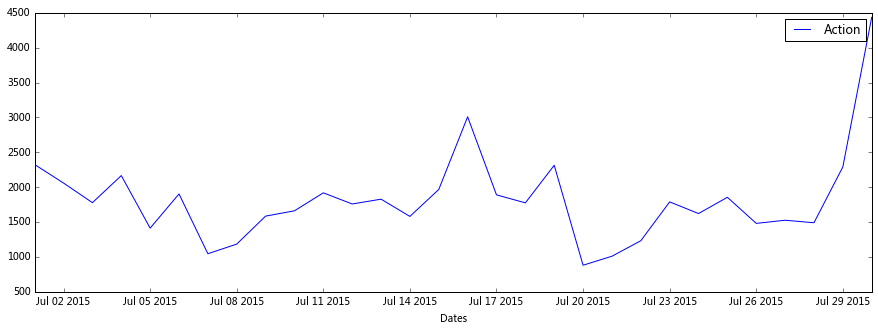

In [159]:
buy_cnt.plot(kind='line', figsize=[15,5], legend=True)

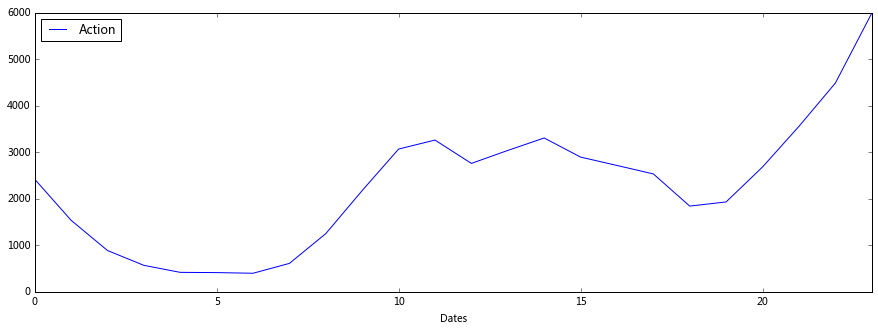

In [160]:
buy_hour_cnt = orders.groupby(orders['Dates'].dt.hour)['Action'].count()
buy_hour_cnt.plot(kind='line', figsize=[15,5], legend=True)

In [161]:
orders['Total_price'] = orders['Quantity'] * orders['Price']


In [163]:
orders.head()

,Dates,Action,User,Product,Quantity,Price,Total_Price,Total_price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069,1069,1069
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680,1680,1680
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285,285,285
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550,550,550
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249,249,249


In [164]:
g = orders.groupby('User')['Total_price'].sum().sort_values(ascending=False)[0:10]


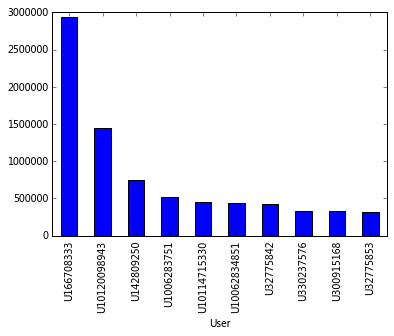

In [165]:
g.plot(kind='bar')

In [168]:
view_daily_cnt = views.groupby(by=views['Dates'].dt.date)['Action'].count()
view_daily_cnt.head()

Dates
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

In [169]:
orders_daily_cnt = orders.groupby(by=orders['Dates'].dt.date)['Action'].count()
orders_daily_cnt.head()

Dates
2015-07-01    2324
2015-07-02    2059
2015-07-03    1778
2015-07-04    2166
2015-07-05    1413
Name: Action, dtype: int64

In [170]:
view_daily_cnt.count()

61

In [171]:
orders_daily_cnt.count()

30

In [181]:
df = pd.concat([view_daily_cnt, orders_daily_cnt], axis=1)

In [182]:
df.tail()

,Action,Action
2015-08-26,19867,NaN
2015-08-27,18985,NaN
2015-08-28,20438,NaN
2015-08-29,23000,NaN
2015-08-30,29138,NaN


In [183]:
#df.dropna()
df.dropna(inplace=True)
#df

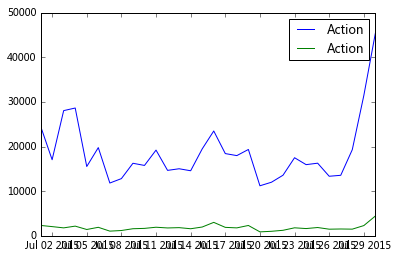

In [184]:
df.plot(kind="line")

In [186]:
df.columns = ['View', 'Buy']

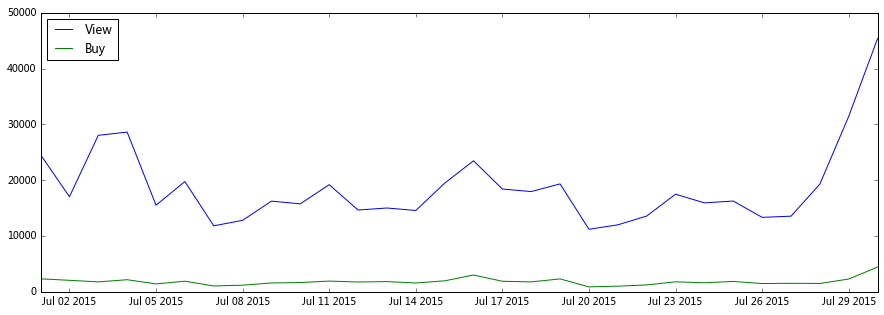

In [188]:
df.plot(kind="line", figsize=[15,5], legend=True)

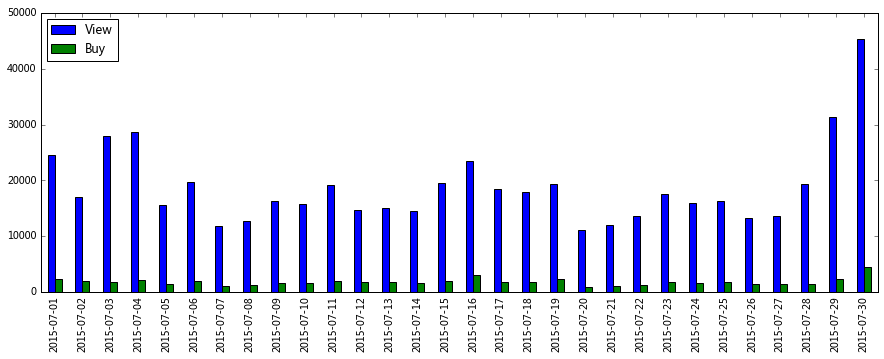

In [189]:
df.plot(kind="bar", figsize=[15,5], legend=True)